To predict if the patient have heart disease or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('Heart_Disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

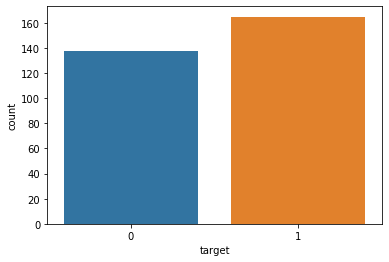

In [6]:
sns.countplot(df['target'])  # sns.countplot(x='target', data=df, palette='bwr') plt.show()

In [12]:
# count number of disease

countNoDisease=len(df[df.target==0])
countHaveDisease=len(df[df.target==1])

print("Percentage of people have no Heart Disease : {:.2f}%". format((countNoDisease/ (len(df.target))*100)))

Percentage of people have no Heart Disease : 45.54%


In [13]:
print("Percentage of people having Heart Disease: {:.2f}%".format((countHaveDisease/(len(df.target))*100)))

Percentage of people having Heart Disease: 54.46%


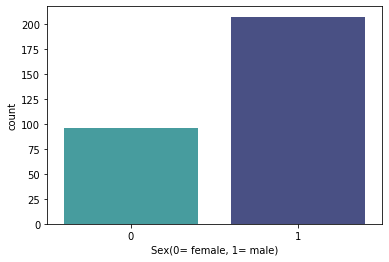

In [14]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex(0= female, 1= male)")
plt.show()

In [15]:
countFemale=len(df[df.sex==0])
countMale=len(df[df.sex==1])

print("Percentage of Female Patients : {:.2f}%".format((countFemale/len(df.sex))*100))

Percentage of Female Patients : 31.68%


In [18]:
print("Percentage of Male Patients : {:.2f}%" .format((countMale/len(df.sex))*100))

Percentage of Male Patients : 68.32%


In [20]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


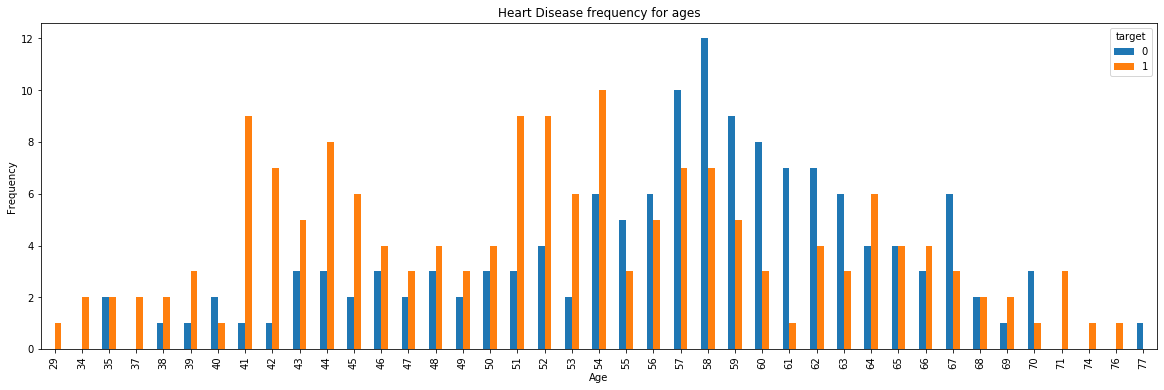

In [22]:
pd.crosstab(df.age, df.target).plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease frequency for ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('HeartDiseaseAndAges.png')
plt.show()

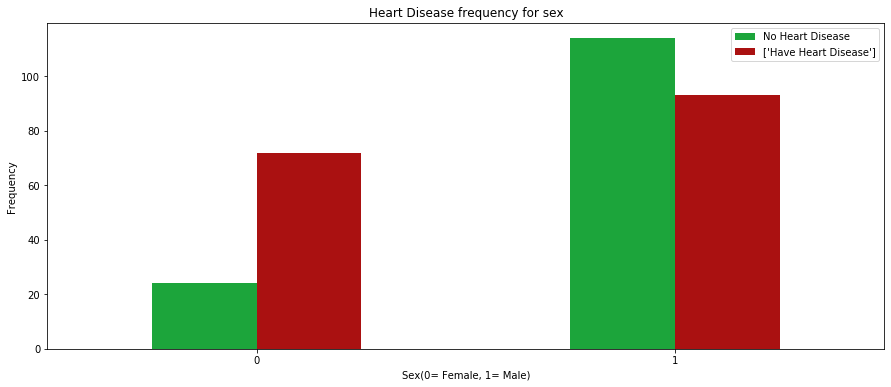

In [23]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(15,6), color=['#1CA53B','#AA1111'])

plt.title('Heart Disease frequency for sex')
plt.xlabel('Sex(0= Female, 1= Male)')
plt.xticks(rotation =0)
plt.legend(['No Heart Disease', ['Have Heart Disease']])
plt.ylabel('Frequency')
plt.show()

In [27]:
import matplotlib.cm as cm

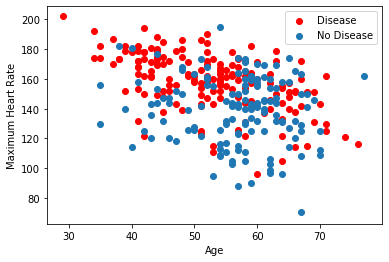

In [33]:
plt.scatter(x= df.age[df.target==1], y= df.thalach[df.target==1], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target ==0], cmap='viridis')

plt.legend(['Disease', 'No Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

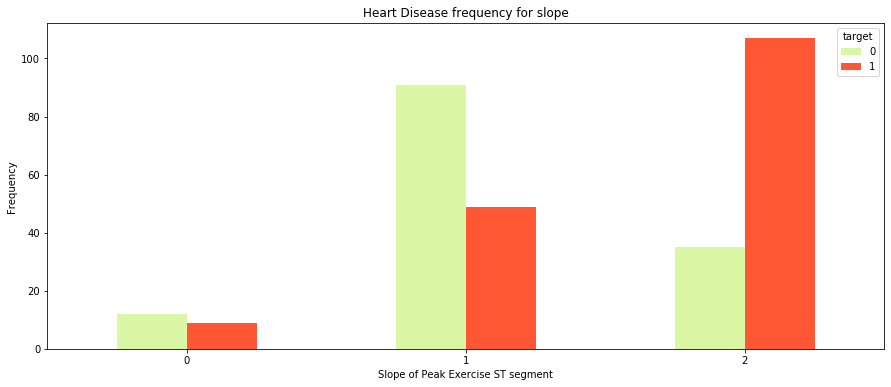

In [34]:
pd.crosstab(df.slope, df.target).plot(kind='bar', figsize=(15,6), color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease frequency for slope')
plt.xlabel('Slope of Peak Exercise ST segment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

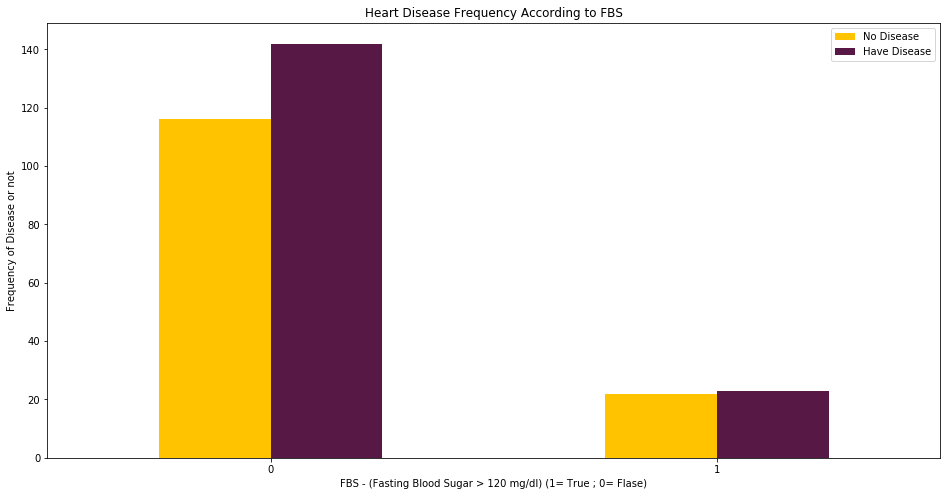

In [35]:
pd.crosstab(df.fbs, df.target).plot(kind='bar', figsize=(16,8), color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency According to FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1= True ; 0= Flase)')
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Have Disease'])
plt.ylabel('Frequency of Disease or not')
plt.show()

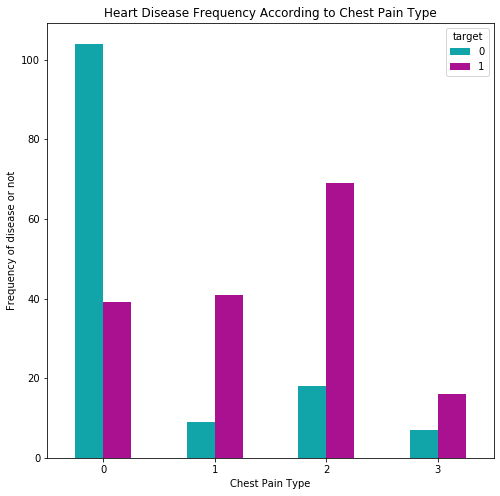

In [36]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(8,8), color=['#11A5AA','#AA1190'])

plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency of disease or not')
plt.show()

In [39]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [41]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Creating Model for Logistic Regression

In [45]:
y= df.target.values
Features=df.drop(['target'], axis=1)

In [46]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [47]:
x_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:
RS=RobustScaler()

In [50]:
X_data=RS.fit_transform(Features)
X_data

array([[ 0.59259259,  0.        ,  1.        , ..., -1.        ,
         0.        , -1.        ],
       [-1.33333333,  0.        ,  0.5       , ..., -1.        ,
         0.        ,  0.        ],
       [-1.03703704, -1.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.96296296,  0.        , -0.5       , ...,  0.        ,
         2.        ,  1.        ],
       [ 0.14814815,  0.        , -0.5       , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.14814815, -1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

### Without Train, Test and split

In [51]:
Lr= LogisticRegression()

In [52]:
Lr.fit(X_data, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
Lr.score(X_data,y )

0.8514851485148515

### With Train, Test, and Split

In [57]:
X_train,X_test,Y_train,Y_test= train_test_split(X_data,y, test_size=0.20)

In [58]:
X_train.shape

(242, 13)

In [59]:
Y_train.shape

(242,)

In [60]:
X_test.shape

(61, 13)

In [61]:
Y_test.shape

(61,)

In [64]:
ModelLR=LogisticRegression()

In [65]:
ModelLR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
LR_Train_Score=ModelLR.score(X_train, Y_train)
LR_Train_Score

0.8677685950413223

In [67]:
LR_Test_Score=ModelLR.score(X_test, Y_test)
LR_Test_Score

0.8524590163934426

In [68]:
ModelLR.coef_

array([[-0.14970875, -1.36720165,  1.51458727, -0.46814693, -0.01719223,
         0.342226  ,  0.46397585,  0.66122777, -0.83892161, -0.86955319,
         0.44748166, -0.64783453, -0.81888368]])

In [69]:
ModelLR.intercept_

array([1.03600938])

In [70]:
LR_New_Pred= ModelLR.predict(X_test)
LR_New_Pred

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [73]:
LR_df=pd.DataFrame({'Actual': Y_test, 'New_Prediction': LR_New_Pred, 'Error': Y_test-LR_New_Pred})
LR_df. head()

,Actual,New_Prediction,Error
0,0,1,-1
1,0,1,-1
2,1,1,0
3,1,1,0
4,1,0,1


In [74]:
ModelLR.predict_proba(X_test)

array([[0.35917571, 0.64082429],
       [0.18816775, 0.81183225],
       [0.43527444, 0.56472556],
       [0.01546551, 0.98453449],
       [0.70271065, 0.29728935],
       [0.8877948 , 0.1122052 ],
       [0.28699882, 0.71300118],
       [0.0983056 , 0.9016944 ],
       [0.72788177, 0.27211823],
       [0.24146999, 0.75853001],
       [0.2631115 , 0.7368885 ],
       [0.08669829, 0.91330171],
       [0.92949578, 0.07050422],
       [0.1871222 , 0.8128778 ],
       [0.85885371, 0.14114629],
       [0.21772565, 0.78227435],
       [0.242462  , 0.757538  ],
       [0.83081247, 0.16918753],
       [0.51115456, 0.48884544],
       [0.97469227, 0.02530773],
       [0.05869385, 0.94130615],
       [0.93878906, 0.06121094],
       [0.08183375, 0.91816625],
       [0.05719848, 0.94280152],
       [0.09171209, 0.90828791],
       [0.99400854, 0.00599146],
       [0.93985549, 0.06014451],
       [0.1607574 , 0.8392426 ],
       [0.92470276, 0.07529724],
       [0.49988853, 0.50011147],
       [0.

### Model Evaluation

In [75]:
from sklearn.metrics import confusion_matrix,classification_report

In [77]:
cm= confusion_matrix(Y_test, LR_New_Pred)
cm

array([[23,  8],
       [ 1, 29]], dtype=int64)

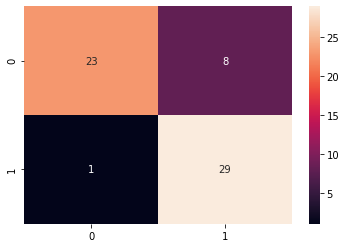

In [78]:
sns.heatmap(cm, annot= True)

In [79]:
print(classification_report(Y_test, LR_New_Pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



### Creating Model for K-Nearest Neighbor

In [80]:
from sklearn.neighbors import KNeighborsClassifier


In [81]:
KNN_Model=KNeighborsClassifier(n_neighbors=3, metric= 'euclidean' )

KNN_Model.fit(X_data, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [82]:
KNN_Model.classes_

array([0, 1], dtype=int64)

In [83]:
KNN_Model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [84]:
KNN_Train_Score=KNN_Model.score(X_train, Y_train)
KNN_Train_Score

0.8966942148760331

In [86]:
KNN_Model.fit(X_test, Y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [88]:
KNN_Test_Score=KNN_Model.score(X_test,Y_test)
KNN_Test_Score

0.8852459016393442

In [89]:
KNN_New_Predict=KNN_Model.predict(X_test)
KNN_New_Predict

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [91]:
KNN_df= pd.DataFrame({'Actual': Y_test, 'KNN_New_Prediction' : KNN_New_Predict, 'Error': Y_test-KNN_New_Predict})
KNN_df.head()

,Actual,KNN_New_Prediction,Error
0,0,0,0
1,0,0,0
2,1,1,0
3,1,1,0
4,1,1,0


In [94]:
cm_KNN= confusion_matrix(Y_test, KNN_New_Predict)
cm_KNN

array([[26,  5],
       [ 2, 28]], dtype=int64)

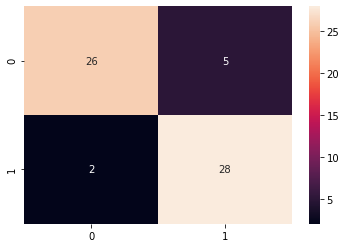

In [95]:
sns.heatmap(cm_KNN, annot=True)

In [96]:
print(classification_report(Y_test,KNN_New_Predict ))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        31
           1       0.85      0.93      0.89        30

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Creating Model for Naive Bayes

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
gnb= GaussianNB()

In [99]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [100]:
gnb.fit(X_test, Y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
NB_Train_Score=gnb.score(X_train, Y_train)
NB_Train_Score

0.768595041322314

In [103]:
gnb.fit(X_test, Y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [104]:
NB_Test_Score1=gnb.score(X_test, Y_test)
NB_Test_Score1

0.8524590163934426

In [105]:
NB_New_Predict= gnb.predict(X_test)
NB_New_Predict

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [107]:
NB_df= pd.DataFrame({'Actual': Y_test, 'NB_New_Prediction' : NB_New_Predict, 'Error': Y_test-NB_New_Predict})
NB_df.head()

,Actual,NB_New_Prediction,Error
0,0,1,-1
1,0,0,0
2,1,1,0
3,1,1,0
4,1,0,1


In [108]:
cm_NB= confusion_matrix(Y_test, NB_New_Predict)
cm_NB

array([[26,  5],
       [ 4, 26]], dtype=int64)

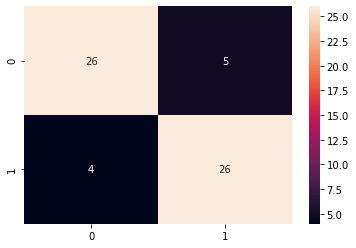

In [109]:
sns.heatmap(cm_NB, annot= True)

In [110]:
print(classification_report(Y_test, NB_New_Predict))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.84      0.87      0.85        30

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Creating Model for Support Vector Machine

In [111]:
from sklearn.svm import SVC

In [112]:
Model_SVC= SVC()

In [113]:
Model_SVC.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
SVC_Train_Score=Model_SVC.score(X_train, Y_train)
SVC_Train_Score

0.9049586776859504

In [116]:
Model_SVC.fit(X_test, Y_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [118]:
SVC_Test_Score=Model_SVC.score(X_test, Y_test)
SVC_Test_Score

0.9344262295081968

In [119]:
SVC_New_Predict=Model_SVC.predict(X_test)
SVC_New_Predict

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [121]:
df_SVC= pd.DataFrame({'Actual': Y_test, 'SVC_New_Prediction': SVC_New_Predict, 'Error': Y_test-SVC_New_Predict})
df_SVC.head()

,Actual,SVC_New_Prediction,Error
0,0,0,0
1,0,1,-1
2,1,1,0
3,1,1,0
4,1,1,0


In [122]:
cm_SVC= confusion_matrix(Y_test, SVC_New_Predict)
cm_SVC

array([[27,  4],
       [ 0, 30]], dtype=int64)

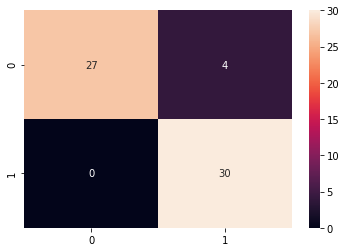

In [123]:
sns.heatmap(cm_SVC, annot= True)

In [124]:
print(classification_report(Y_test, SVC_New_Predict))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        31
           1       0.88      1.00      0.94        30

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



### Creating Model For Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
Model_dtc= DecisionTreeClassifier()

In [129]:
Model_dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
DTC_Train_Score= Model_dtc.score(X_train, Y_train)
DTC_Train_Score

1.0

In [131]:
Model_dtc.fit(X_test, Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
DTC_Test_Score= Model_dtc.score(X_test, Y_test)
DTC_Test_Score

1.0

In [133]:
DTC_New_Predict=Model_dtc.predict(X_test)
DTC_New_Predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [135]:
DTC_df= pd.DataFrame({'Actual': Y_test, 'DTC_New_Prediction': DTC_New_Predict, 'Error': Y_test-DTC_New_Predict})
DTC_df.head()

,Actual,DTC_New_Prediction,Error
0,0,0,0
1,0,0,0
2,1,1,0
3,1,1,0
4,1,1,0


In [136]:
cm_DTC=confusion_matrix(Y_test, DTC_New_Predict)
cm_DTC

array([[31,  0],
       [ 0, 30]], dtype=int64)

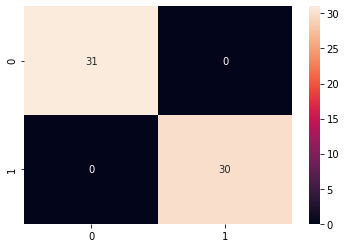

In [137]:
sns.heatmap(cm_DTC, annot=True)


In [140]:
print(classification_report(Y_test, DTC_New_Predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        30

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



### Creating Model Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
RF_Model= RandomForestClassifier(n_estimators= 1000, random_state=1)

In [144]:
RF_Model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [145]:
RF_Train_Score= RF_Model.score(X_train,Y_train)
RF_Train_Score

1.0

In [146]:
RF_Model.fit(X_test, Y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [148]:
RF_Test_Score= RF_Model.score(X_test, Y_test)
RF_Test_Score

1.0

In [149]:
RF_New_Predict=RF_Model.predict(X_test)
RF_New_Predict

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [151]:
RF_df= pd.DataFrame({'Actual': Y_test, 'RF_New_Prediction': RF_New_Predict, 'Error': Y_test-RF_New_Predict})
RF_df.head()

,Actual,RF_New_Prediction,Error
0,0,0,0
1,0,0,0
2,1,1,0
3,1,1,0
4,1,1,0


In [154]:
cm_RF= confusion_matrix(Y_test, RF_New_Predict)
cm_RF

array([[31,  0],
       [ 0, 30]], dtype=int64)

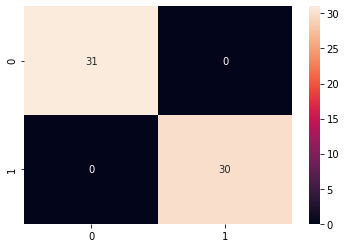

In [155]:
sns.heatmap(cm_RF, annot=True)

In [156]:
print(classification_report(Y_test, RF_New_Predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        30

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



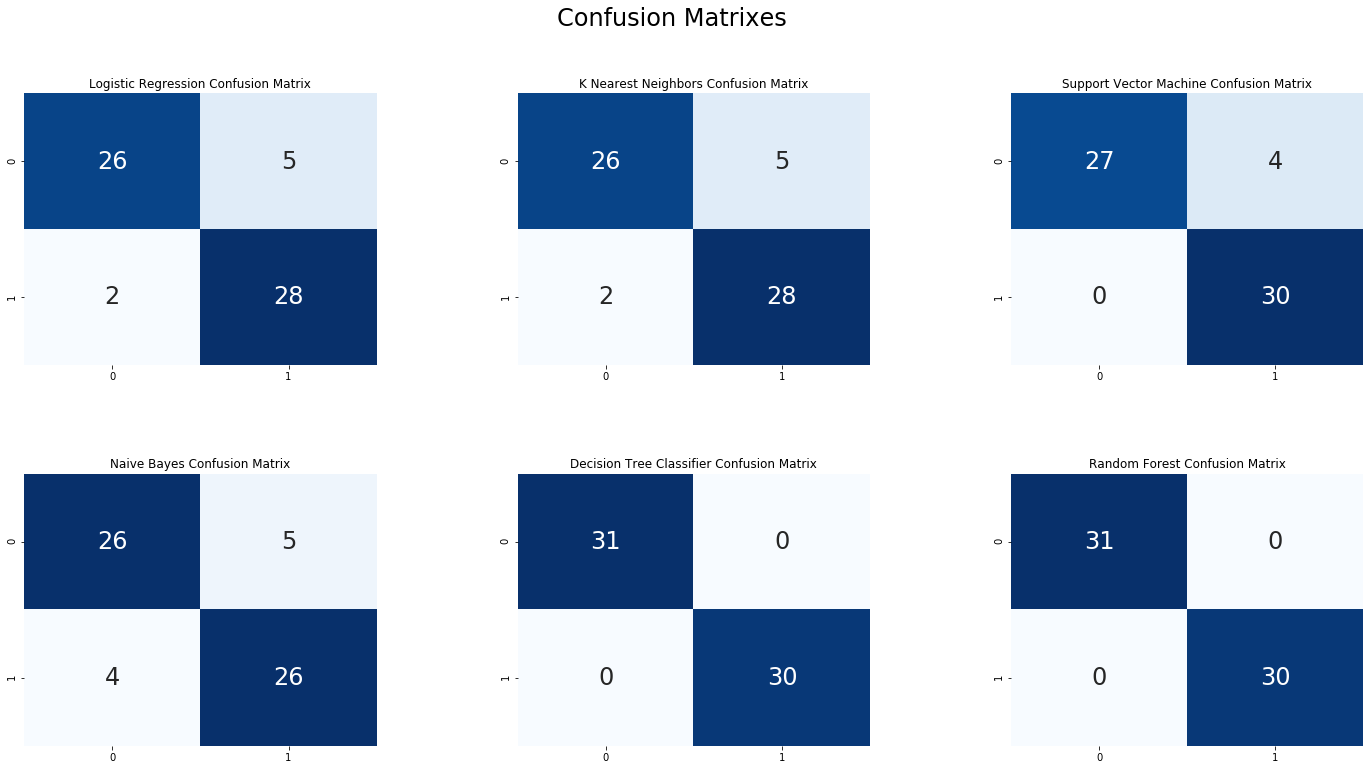

In [157]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_KNN,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_SVC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_NB,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_DTC,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()